In [4]:
import torch
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

In [18]:
t_stats = np.loadtxt('torch.stats')
tf_stats = joblib.load('tf.stats')

In [19]:
tf_stats

[[[-0.0036989152, 6.505168, 2.3220747, 2.097599],
  [-0.044167295, 6.37772, 2.3089561, 2.0782015],
  [-0.08993398, 6.1656303, 2.2986975, 2.0612166],
  [-0.113069594, 5.8719153, 2.289644, 2.0445118],
  [-0.14539051, 5.6527605, 2.3064375, 2.044775],
  [-0.17833605, 5.292564, 2.276198, 2.0135314],
  [-0.24992871, 4.9584126, 2.279314, 2.0084186],
  [-0.2919829, 4.3596416, 2.2755194, 1.9981182],
  [-0.38212553, 3.8121052, 2.2954633, 2.0140166],
  [-0.42272085, 3.2891073, 2.2791739, 1.985327],
  [-0.5042489, 2.679326, 2.271624, 1.9794928],
  [-0.6643482, 2.2201314, 2.2508948, 1.977941],
  [-0.7126483, 1.3938297, 2.2752764, 1.9959205],
  [-0.78249335, 1.1813233, 2.205927, 1.9420593],
  [-0.89817286, 0.8185326, 2.2324798, 1.9550941],
  [-1.0444676, 0.354253, 2.1891704, 1.9659067],
  [-1.1010675, 0.18989937, 2.1997967, 1.9430314],
  [-1.2122881, 0.1690031, 2.163604, 1.9571781],
  [-1.2252239, 0.29312703, 2.0701914, 1.9447035],
  [-1.2988396, 0.44226798, 2.1479995, 1.9667029],
  [-1.2985464, 0.3

In [11]:
t_stats.shape

(65, 4)

In [13]:
df = pd.DataFrame(np.concatenate([t_stats, tf_stats[0]], axis=1), columns=['torch_d_loss', 'torch_gp', 'torch_g_loss', 'torch_ce', 'tf_d_loss', 'tf_gp', 'tf_g_loss', 'tf_ce'])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 65 and the array at index 1 has size 325

In [31]:
df.head(10)

,torch_d_loss,torch_gp,torch_g_loss,torch_ce,tf_d_loss,tf_gp,tf_g_loss,tf_ce
0,0.000447,6.403164,2.125732,2.070961,-0.011343,6.641808,2.134890,2.122992
1,-0.006177,6.237246,2.168409,2.110501,-0.065487,6.502369,2.106772,2.106742
2,-0.048009,6.154182,2.185760,2.132594,-0.128129,6.430120,2.032247,2.055894
3,-0.072010,5.891101,2.167625,2.088027,-0.166313,6.103891,1.983751,2.031719
4,-0.105315,5.721035,2.169309,2.088608,-0.241713,5.842129,1.938118,2.016043
5,-0.122078,5.348476,2.100494,2.015141,-0.309921,5.791576,1.913399,2.025955
6,-0.219425,5.163280,2.165875,2.047871,-0.430393,5.180809,1.850009,2.006179
7,-0.239047,4.747630,2.166232,2.067382,-0.545925,4.812606,1.803082,1.995610
8,-0.300932,4.325020,2.156828,2.049295,-0.810001,4.343146,1.725229,1.970033
9,-0.321023,3.791967,2.144279,1.984714,-0.994893,3.748530,1.686026,1.980831


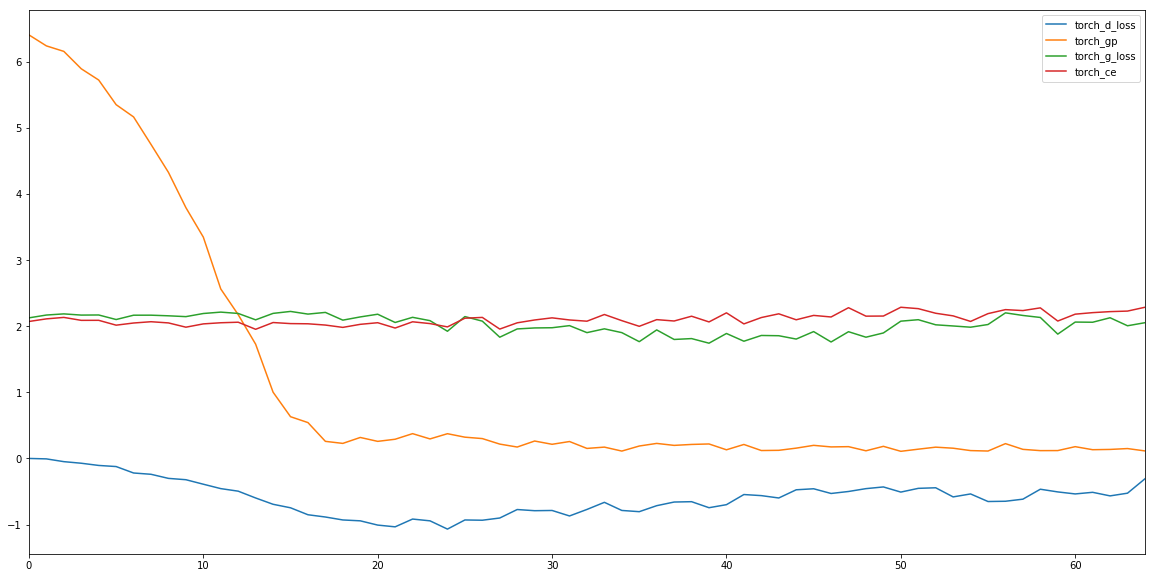

In [37]:
df.iloc[:,:4].plot(figsize=(20,10))

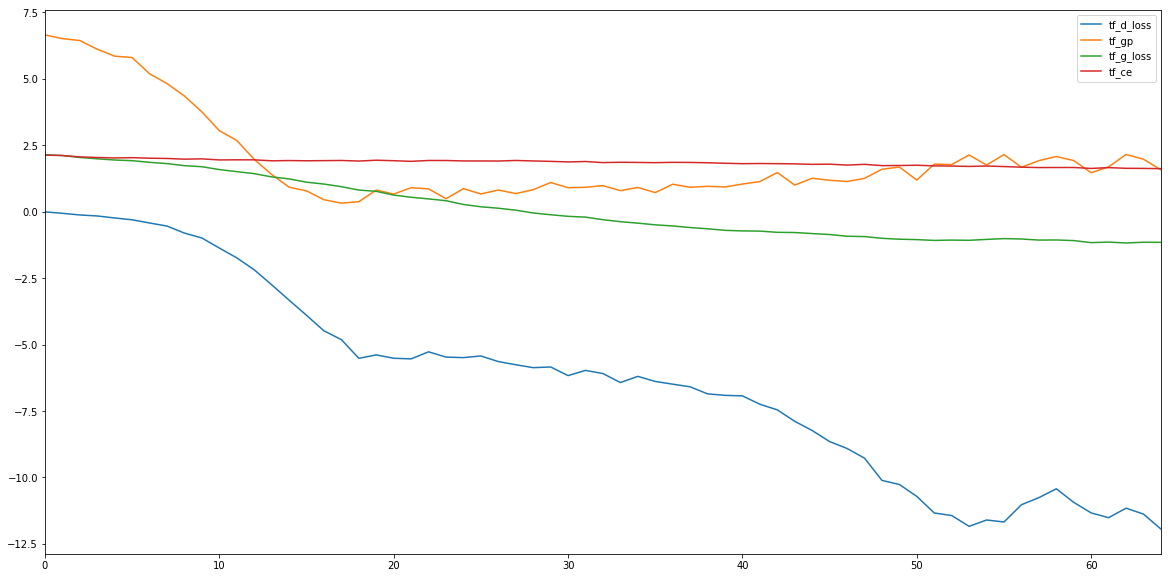

In [38]:
df.iloc[:,4:].plot(figsize=(20,10))

In [20]:
grads = pd.DataFrame(np.concatenate([tf_stats[1], tf_stats[2]], axis=1), columns=['tf_grad_d_w', 'tf_grad_d_b', 'tf_grad_g_w', 'tf_grad_g_b'])

In [21]:
grads.head()

,tf_grad_d_w,tf_grad_d_b,tf_grad_g_w,tf_grad_g_b
0,0.000011,0.000158,-8.814275e-07,-3.682388e-11
1,-0.000045,-0.000739,4.521979e-06,4.656187e-11
2,-0.000075,-0.001274,4.232642e-06,3.872458e-13
3,-0.000075,-0.001338,7.611649e-06,-8.850076e-11
4,-0.000126,-0.002189,-7.734379e-06,5.179324e-11


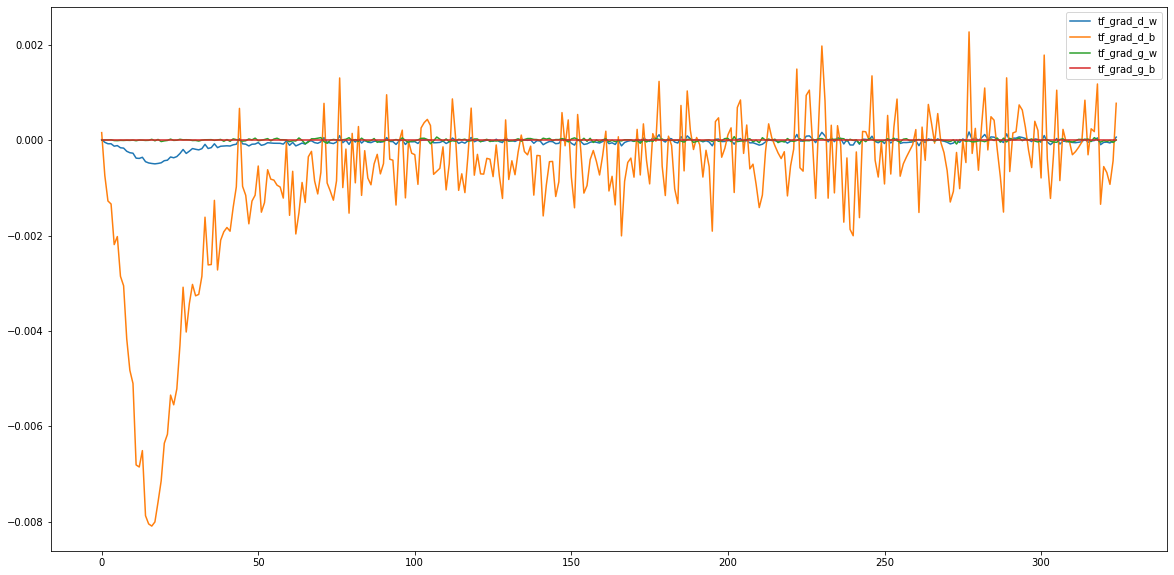

In [22]:
grads.plot(figsize=(20,10))

In [23]:
weights = pd.DataFrame(np.concatenate([tf_stats[3], tf_stats[4]], axis=1), columns=['tf_d_w', 'tf_d_b', 'tf_g_w', 'tf_g_b'])

In [24]:
weights.head()

,tf_d_w,tf_d_b,tf_g_w,tf_g_b
0,0.000001,-0.001967,0.000038,0.002120
1,0.000002,-0.001946,0.000037,0.002120
2,0.000004,-0.001916,0.000037,0.002120
3,0.000006,-0.001885,0.000037,0.002121
4,0.000010,-0.001829,0.000037,0.002120


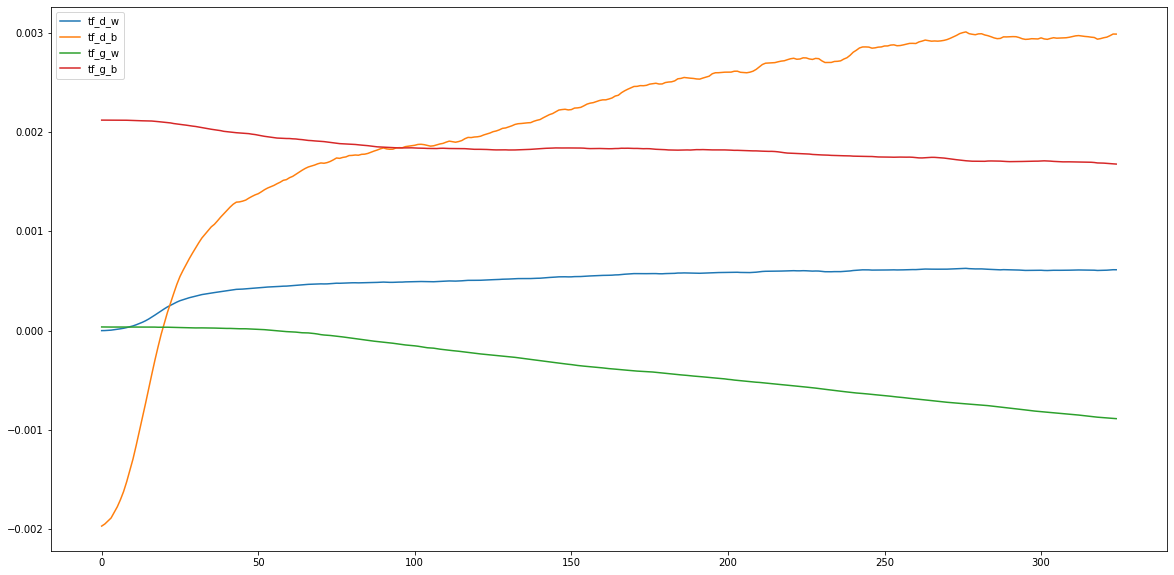

In [25]:
weights.plot(figsize=(20,10))